# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd

In [3]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [5]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
match.shape

(756, 18)

In [9]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
total_score_df['total_runs'] += 1

In [13]:
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [15]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on = 'match_id')

In [17]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [19]:
teams = [
    'Chennai Super Kings',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Delhi Capitals',
    'Punjab Kings',
    'Gujrat Titans',
    'Lucknow Supergaints',
    'Sunrisers Hyderabad',
    'Rajasthan Royals',
    'Kolkata Knight Riders'
]

In [21]:
match_df ['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df ['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df ['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df ['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

match_df ['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df ['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')

match_df ['team1'] = match_df['team1'].str.replace('Rising Pune Supergiants', 'Lucknow Supergiants')
match_df ['team2'] = match_df['team2'].str.replace('Rising Pune Supergiants', 'Lucknow Supergiants')

match_df ['team1'] = match_df['team1'].str.replace('Pune Warriors', 'Lucknow Supergiants')
match_df ['team2'] = match_df['team2'].str.replace('Pune Warriors', 'Lucknow Supergiants')

match_df ['team1'] = match_df['team1'].str.replace('Kochi Tuskers Kerala', 'Chennai Super Kings')
match_df ['team2'] = match_df['team2'].str.replace('Kochi Tuskers Kerala', 'Chennai Super Kings')

match_df ['team1'] = match_df['team1'].str.replace('Gujarat Lions', 'Gujrat Titans')
match_df ['team2'] = match_df['team2'].str.replace('Gujarat Lions', 'Gujrat Titans')

match_df ['team1'] = match_df['team1'].str.replace('Rising Pune Supergiant', 'Lucknow Supergiants')
match_df ['team2'] = match_df['team2'].str.replace('Rising Pune Supergiant', 'Lucknow Supergiants')

In [23]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [25]:
match_df.shape

(680, 20)

In [27]:
match_df = match_df[match_df['dl_applied'] == 0]

In [29]:
match_df = match_df[['match_id', 'city', 'total_runs', 'winner']]

In [31]:
delivery_df = match_df.merge(delivery, on = 'match_id')

In [33]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [35]:
delivery_df.shape

(76605, 24)

In [37]:
# Ensure 'total_runs_y' is numeric
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Handle NaN values
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].fillna(0)

# Calculate cumulative sum within each group
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [39]:
delivery_df ['runs_left'] = delivery_df ['total_runs_x'] - delivery_df['current_score']
delivery_df

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158473,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,1
158474,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
158475,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
158476,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [41]:
delivery_df['balls_left'] = 126 - (delivery_df['over'] * 6 + delivery_df['ball'])
delivery_df

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158473,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
158474,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
158475,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
158476,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [43]:
# Fill NaN values and convert 'player_dismissed' to int (1 for dismissed, 0 for not dismissed)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)  # '0' as numeric
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 1 if x != 0 else 0)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)

wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

delivery_df['wickets'] = 10 - wickets
delivery_df['wickets'] = delivery_df['wickets'].clip(lower=0, upper=10)
delivery_df.head()

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [45]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [47]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [49]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [51]:
delivery_df['result'] = delivery_df.apply(result, axis=1)

In [52]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr', 'result']]

In [55]:
final_df = final_df.sample(final_df.shape[0])

In [67]:
final_df.dropna(inplace = True)

In [83]:
final_df = final_df[final_df['balls_left'] != 0]

In [85]:
x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

In [89]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [117]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver = 'liblinear'))
])

In [119]:
x_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,60419.000000,60419.000000,60419.000000,60419.000000,60419.000000,60419.000000
mean,93.436022,63.035552,7.561678,166.642497,7.489492,10.492035
std,50.039611,33.195771,2.116508,29.266189,2.299140,13.587830
min,-15.000000,-2.000000,0.000000,66.000000,0.000000,-516.000000
25%,54.000000,35.000000,6.000000,148.000000,6.281250,7.224490
50%,93.000000,64.000000,8.000000,166.000000,7.500000,8.944444
75%,131.000000,92.000000,9.000000,186.000000,8.754098,10.957853
max,250.000000,119.000000,10.000000,251.000000,36.000000,684.000000


In [121]:
pipe.fit(x_train, y_train)

C:\Users\Shaurya Dobhal\Anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [123]:
y_pred = pipe.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8076795762992387

In [131]:
pipe.predict_proba(x_test)[8]

array([0.30673594, 0.69326406])

In [133]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [135]:
temp_df, target = match_progression(delivery_df,1,pipe)
temp_df

Target- 208


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,0,87.5,12.5
136,2,1,0,91.3,8.7
142,3,16,0,83.0,17.0
148,4,11,0,77.1,22.9
155,5,5,0,77.8,22.2
162,6,10,1,83.1,16.9
168,7,7,1,89.3,10.7
174,8,13,0,83.6,16.4
180,9,10,0,79.2,20.8
187,10,10,0,73.9,26.1


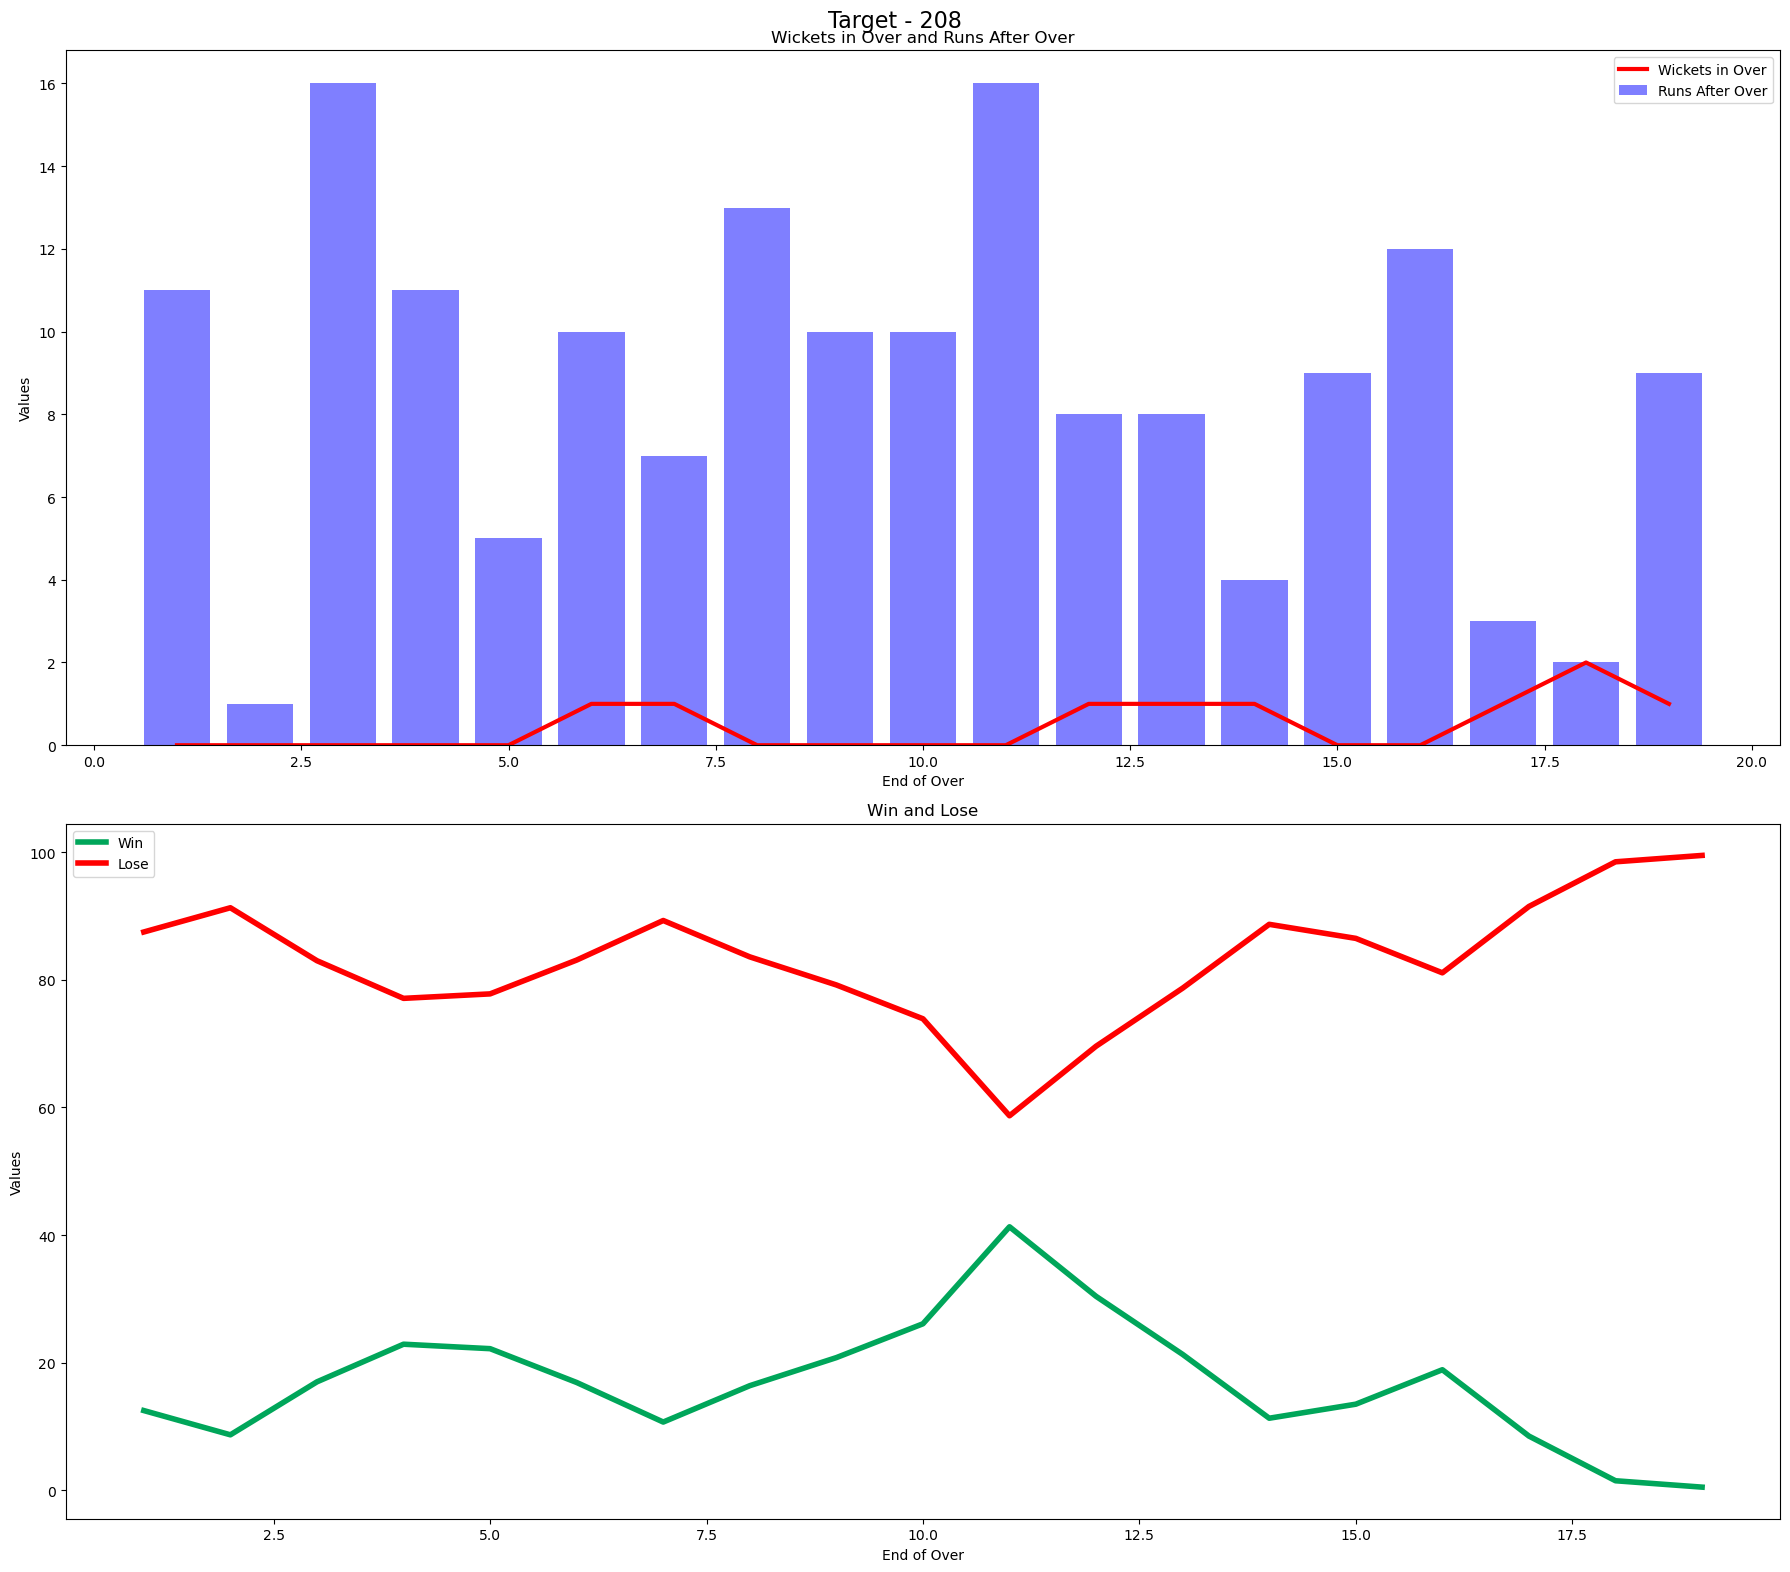

In [143]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(18, 16))
axs[0].plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='red', linewidth=3, label='Wickets in Over')
axs[0].bar(temp_df['end_of_over'], temp_df['runs_after_over'], color='blue', alpha=0.5, label='Runs After Over')

axs[0].set_title('Wickets in Over and Runs After Over')
axs[0].set_xlabel('End of Over')
axs[0].set_ylabel('Values')
axs[0].legend()
axs[1].plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4, label='Win')

axs[1].plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4, label='Lose')
axs[1].set_title('Win and Lose')
axs[1].set_xlabel('End of Over')
axs[1].set_ylabel('Values')
axs[1].legend()

plt.suptitle('Target - ' + str(target), fontsize=16)
plt.tight_layout()
plt.show()

In [145]:
teams

['Chennai Super Kings',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Delhi Capitals',
 'Punjab Kings',
 'Gujrat Titans',
 'Lucknow Supergaints',
 'Sunrisers Hyderabad',
 'Rajasthan Royals',
 'Kolkata Knight Riders']

In [147]:
delivery_df['city'].unique()

array(['Hyderabad', 'Rajkot', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata',
       'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai', 'Cape Town',
       'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad',
       'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam',
       'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Mohali',
       'Bengaluru'], dtype=object)

In [149]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))